In [1]:
# classification example using logistic regression and scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47     

In [3]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
X = dataset.iloc[:, [2, 3]].values #we just take age and estimated salary
y = dataset.iloc[:, 4].values #purchased



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)



In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/yiyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yiyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yiyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

/home/yiyo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# predict the test set results

y_prediction = classifier.predict(X_test)

In [12]:
# confusiong matrix
from sklearn.metrics import confusion_matrix
matrix = (y_test, y_prediction)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


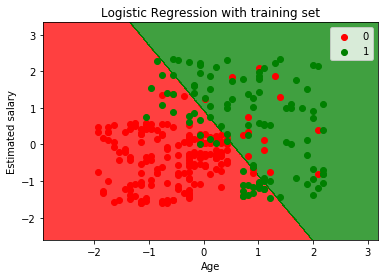

In [13]:
# visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step =.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, 
            classifier.predict(np.array([X1.ravel(),
                                        X2.ravel()]).T).reshape(X1.shape),
            alpha = .75, cmap = 
            ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression with training set')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


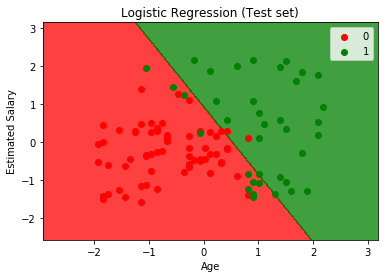

In [15]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step =0.01),np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step =0.01))
plt.contourf(X1, X2,
classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap =ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
c = ListedColormap(('red',
'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# its hard to achieve 100% accuracy in logistic regression